payam taebi 400104867

Implementation
1. Implement Canny Edge Detection from scratch and apply that on Lena.png
image. The below steps must be followed in your code. (35 point)
1. Gray scale conversion
2. Noise reduction
3. Gradient calculation
4. Non-maximum suppression
5. Double Thresholding and hysteresis
(You must Define a function and plot the output for each step)


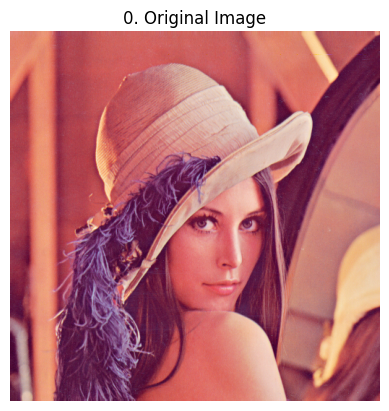

In [1]:
import cv2
import matplotlib.pyplot as plt

def plot_original_image(image_path):
    # Load the original image
    original_image = cv2.imread(image_path)
    
    # Display the original image
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('0. Original Image')
    plt.axis('off')
    plt.show()

# Run the script for plotting the original image
plot_original_image("Lena.png")


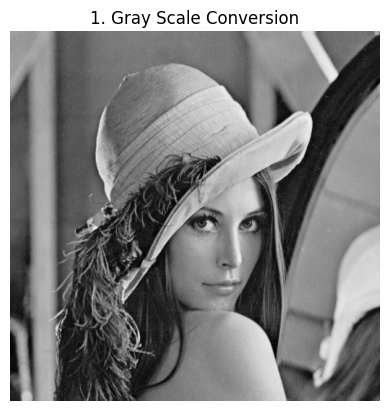

In [2]:
import cv2
import matplotlib.pyplot as plt

def convert_to_gray(image_path):
    # Load the original image
    original_image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    
    # Display the grayscale image
    plt.imshow(gray_image, cmap='gray')
    plt.title('1. Gray Scale Conversion')
    plt.axis('off')
    plt.show()

# Run the script for gray scale conversion
convert_to_gray("Lena.png")


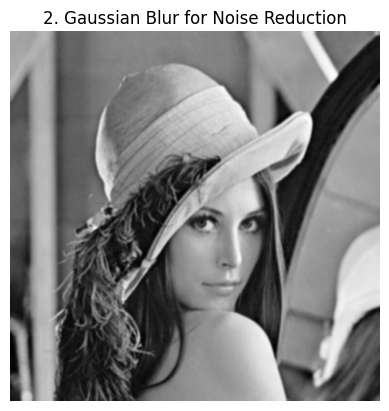

In [3]:
import cv2
import matplotlib.pyplot as plt

def apply_gaussian_blur(image_path, kernel_size=5):
    # Load the original grayscale image
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply Gaussian blur for noise reduction
    blurred_image = cv2.GaussianBlur(gray_image, (kernel_size, kernel_size), 0)
    
    # Display the blurred image
    plt.imshow(blurred_image, cmap='gray')
    plt.title('2. Gaussian Blur for Noise Reduction')
    plt.axis('off')
    plt.show()

# Run the script for Gaussian blur
apply_gaussian_blur("Lena.png")


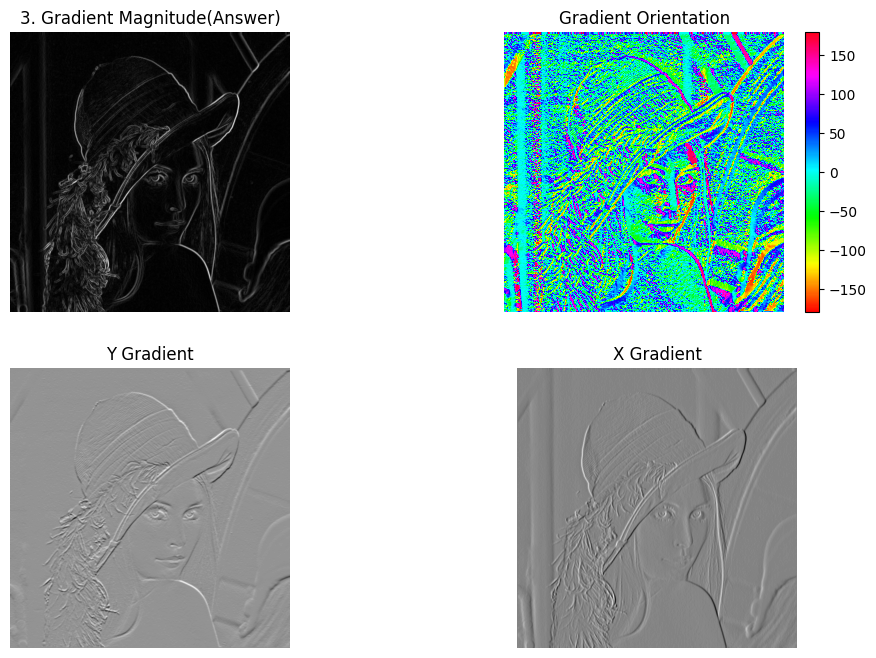

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def calculate_gradients(image_path):
    # Load the original grayscale image
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Calculate gradients using Sobel operators
    gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    angle = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)
    
    # Display the gradient magnitude, x gradient, y gradient, and orientation
    plt.figure(figsize=(12, 8))

    # Plot the gradient magnitude with a larger size
    plt.subplot(2, 2, 1)
    plt.imshow(magnitude, cmap='gray')
    plt.title('3. Gradient Magnitude(Answer)')
    plt.axis('off')

    # Plot the x gradient
    plt.subplot(2, 2, 4)
    plt.imshow(gradient_x, cmap='gray')
    plt.title('X Gradient')
    plt.axis('off')

    # Plot the y gradient
    plt.subplot(2, 2, 3)
    plt.imshow(gradient_y, cmap='gray')
    plt.title('Y Gradient')
    plt.axis('off')

    # Plot the gradient orientation
    plt.subplot(2, 2, 2)
    plt.imshow(angle, cmap='hsv', interpolation='bilinear')
    plt.title('Gradient Orientation')
    plt.colorbar()
    plt.axis('off')

    plt.show()

# Run the script for gradient calculation
calculate_gradients("Lena.png")


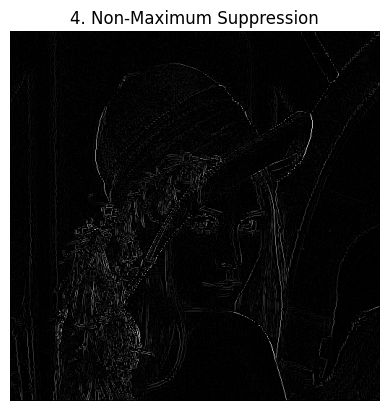

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def non_maximum_suppression(image_path):
    # Load the original grayscale image
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Calculate gradients using Sobel operators
    gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    angle = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)
    
    # Perform non-maximum suppression
    angle = angle % 180
    suppressed_magnitude = np.zeros_like(magnitude)

    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            current_angle = angle[i, j]
            current_magnitude = magnitude[i, j]

            # Identify the neighbors along the gradient direction
            if (0 <= current_angle < 22.5) or (157.5 <= current_angle <= 180):
                neighbor1 = magnitude[i, j+1]
                neighbor2 = magnitude[i, j-1]
            elif (22.5 <= current_angle < 67.5):
                neighbor1 = magnitude[i+1, j-1]
                neighbor2 = magnitude[i-1, j+1]
            elif (67.5 <= current_angle < 112.5):
                neighbor1 = magnitude[i+1, j]
                neighbor2 = magnitude[i-1, j]
            else:
                neighbor1 = magnitude[i-1, j-1]
                neighbor2 = magnitude[i+1, j+1]

            # Suppress pixel value if not a local maximum
            if current_magnitude >= neighbor1 and current_magnitude >= neighbor2:
                suppressed_magnitude[i, j] = current_magnitude

    # Display the result of non-maximum suppression
    plt.imshow(suppressed_magnitude, cmap='gray')
    plt.title('4. Non-Maximum Suppression')
    plt.axis('off')
    plt.show()

# Run the script for non-maximum suppression
non_maximum_suppression("Lena.png")


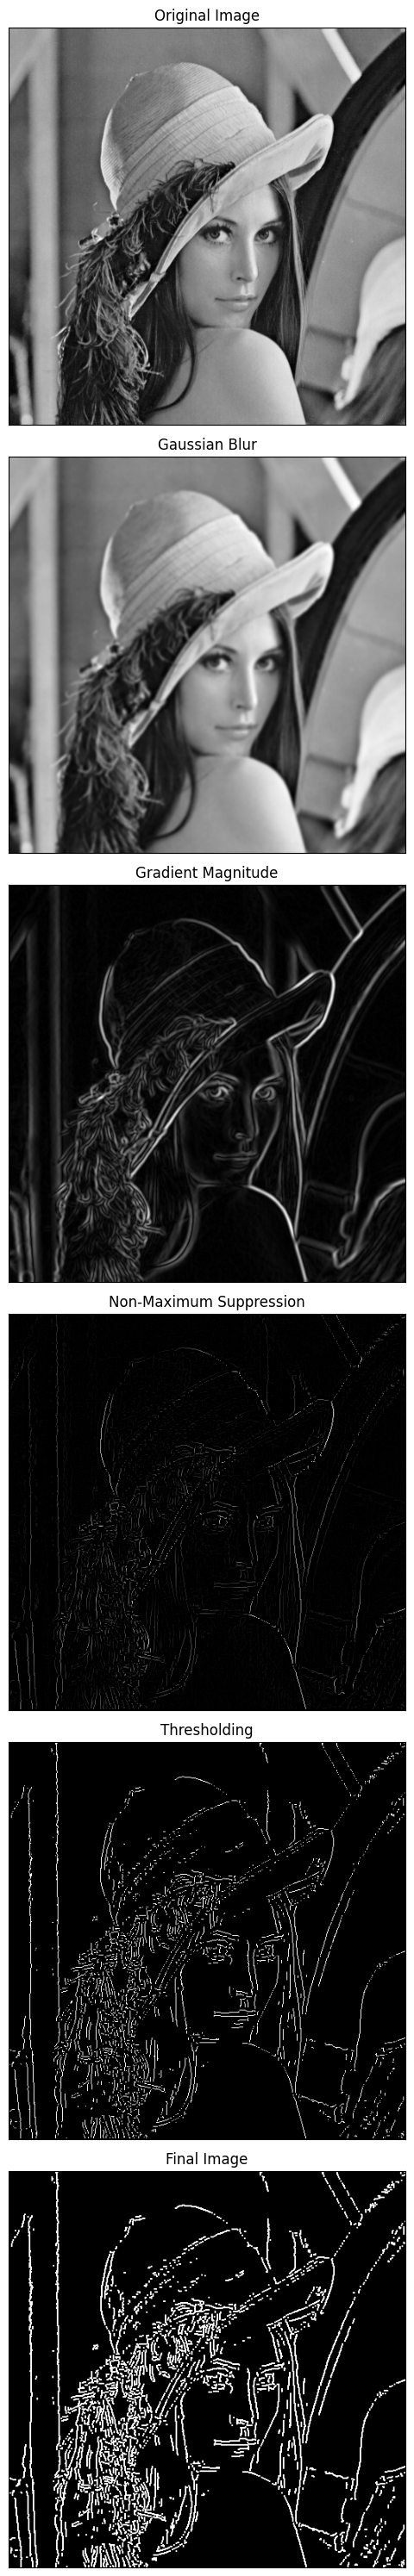

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def gaussian_blur(img, kernel_size=7):  # Increased kernel size for more smoothing
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def calculate_gradients(gray_image):
    gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    angle = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)
    return magnitude, angle

def non_maximum_suppression(magnitude, angle):
    suppressed_magnitude = np.zeros_like(magnitude)
    angle = angle % 180

    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            current_angle = angle[i, j]
            current_magnitude = magnitude[i, j]

            if (0 <= current_angle < 22.5) or (157.5 <= current_angle <= 180):
                neighbors = [magnitude[i, j+1], magnitude[i, j-1]]
            elif (22.5 <= current_angle < 67.5):
                neighbors = [magnitude[i+1, j-1], magnitude[i-1, j+1]]
            elif (67.5 <= current_angle < 112.5):
                neighbors = [magnitude[i+1, j], magnitude[i-1, j]]
            else:
                neighbors = [magnitude[i-1, j-1], magnitude[i+1, j+1]]

            if current_magnitude >= max(neighbors):
                suppressed_magnitude[i, j] = current_magnitude

    return suppressed_magnitude

def double_threshold(img, low_thresh_ratio=0.03, high_thresh_ratio=0.1):  # Adjusted threshold ratios
    high_thresh = img.max() * high_thresh_ratio
    low_thresh = high_thresh * low_thresh_ratio

    res = np.zeros_like(img)
    strong, weak = 255, 25

    strong_i, strong_j = np.where(img >= high_thresh)
    weak_i, weak_j = np.where((img >= low_thresh) & (img < high_thresh))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    return res, weak, strong

def hysteresis(img, weak, strong=255):
    M, N = img.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            if img[i, j] == weak:
                if (img[i+1, j-1:j+2].any() == strong or
                    img[i-1, j-1:j+2].any() == strong or
                    img[i, [j-1, j+1]].any() == strong):
                    img[i, j] = strong
                else:
                    img[i, j] = 0
    return img

def canny_edge_detector(image_path):
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred_img = gaussian_blur(original_img)

    gradient_magnitude, gradient_angle = calculate_gradients(blurred_img)
    non_max_img = non_maximum_suppression(gradient_magnitude, gradient_angle)
    threshold_img, weak, strong = double_threshold(non_max_img)
    final_img = hysteresis(threshold_img, weak, strong)

    # Post-processing (Dilation)
    kernel = np.ones((2, 2), np.uint8)  # Small dilation kernel
    final_img = cv2.dilate(final_img, kernel, iterations=1)

    # Display the steps in a single column with 6 rows (larger images)
    plt.figure(figsize=(12, 30))
    images = [original_img, blurred_img, gradient_magnitude, non_max_img, threshold_img, final_img]
    titles = ['Original Image', 'Gaussian Blur', 'Gradient Magnitude', 'Non-Maximum Suppression', 'Thresholding', 'Final Image']

    for i in range(6):
        plt.subplot(6, 1, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

    plt.tight_layout()
    plt.show()

# Example usage
canny_edge_detector('Lena.png')


2. First Implement Harris key point detector from scratch and apply that on
Harris.png (Slide 91). Second implement Harris using OpenCV and compare
the results. (35 point)


Number of Keypoints (Custom Implementation): 5775
Number of Keypoints (OpenCV Implementation): 5707


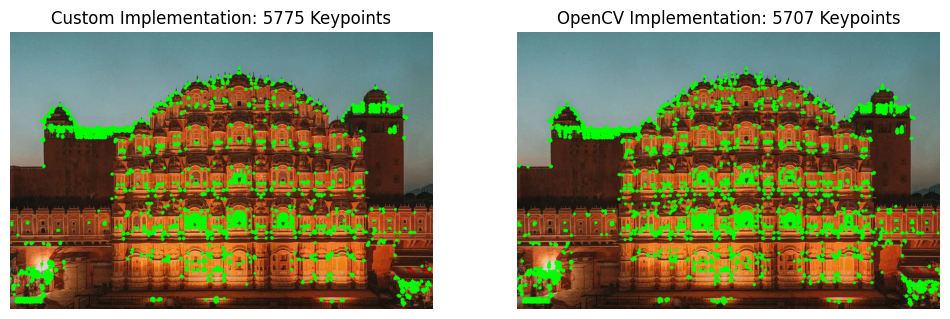

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detector(image, k=0.04, window_size=3, threshold=0.033):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float32)

    # Compute derivatives using Sobel filters
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Compute elements of the Harris matrix
    IxIx = Ix * Ix
    IyIy = Iy * Iy
    IxIy = Ix * Iy

    # Compute the sums of the products in the windows
    Sxx = cv2.boxFilter(IxIx, -1, (window_size, window_size))
    Syy = cv2.boxFilter(IyIy, -1, (window_size, window_size))
    Sxy = cv2.boxFilter(IxIy, -1, (window_size, window_size))

    # Compute the determinant and trace of the Harris matrix
    det_M = (Sxx * Syy) - (Sxy**2)
    trace_M = Sxx + Syy

    # Compute the Harris response
    harris_response = det_M - k * (trace_M**2)

    # Apply thresholding to find keypoints
    keypoints = np.argwhere(harris_response > threshold * harris_response.max())

    return keypoints

# Load the image
image = cv2.imread('Harris.png')

# Apply the Harris corner detector from scratch
keypoints_scratch = harris_corner_detector(image)

# Convert the image to grayscale for OpenCV Harris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Harris corner detection using OpenCV
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Threshold the response to obtain keypoints
threshold = 0.01 * dst.max()
keypoints_opencv = np.argwhere(dst > threshold)

# Draw the keypoints
scratch_image = image.copy()
opencv_image = image.copy()

for keypoint in keypoints_scratch:
    cv2.circle(scratch_image, tuple(keypoint[::-1]), 3, (0, 255, 0), -1)

for keypoint in keypoints_opencv:
    cv2.circle(opencv_image, tuple(keypoint[::-1]), 3, (0, 255, 0), -1)

# Print the number of keypoints
print("Number of Keypoints (Custom Implementation):", len(keypoints_scratch))
print("Number of Keypoints (OpenCV Implementation):", len(keypoints_opencv))

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(scratch_image, cv2.COLOR_BGR2RGB))
plt.title(f'Custom Implementation: {len(keypoints_scratch)} Keypoints')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB))
plt.title(f'OpenCV Implementation: {len(keypoints_opencv)} Keypoints')
plt.axis('off')

plt.show()


with the parameters (image, k=0.04, window_size=3, threshold=0.033), the custom implementation detected 5775 keypoints, and the OpenCV implementation detected 5707 keypoints.

The custom and OpenCV implementations generally yield similar results, which is expected since both are based on the Harris corner detection algorithm. The slight difference in the number of keypoints may arise from implementation details, thresholding methods, or corner refinement techniques used internally in OpenCV.

3. Perform Maximally Stable Extremal Region (MSER) algorithm on img3.jpg.
Find the best hyperparameters to detect all smallest blobs (6 blobs similar to
img3_output.jpg). Feel free to use opencv library . You should report the
final hyperparameters. (30 point)


Best Hyperparameters: (25, 2500, 5500)


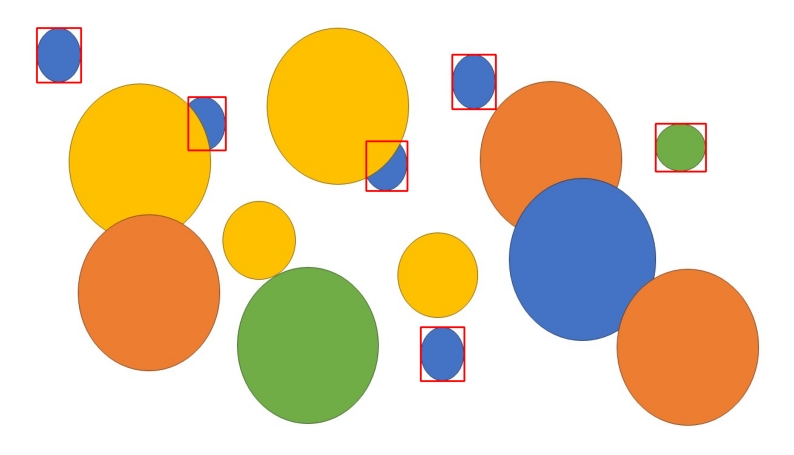

region number = : 47


In [8]:
import cv2
import matplotlib.pyplot as plt

def find_best_hyperparameters(image_path, delta_start, delta_end, delta_step, min_area_start, min_area_end, min_area_step, max_area_start, max_area_end, max_area_step):
    best_result = None
    best_hyperparameters = None

    for delta_value in range(delta_start, delta_end, delta_step):
        for min_area_value in range(min_area_start, min_area_end, min_area_step):
            for max_area_value in range(max_area_start, max_area_end, max_area_step):
                result = mser_algorithm(image_path, delta_value, min_area_value, max_area_value, plot=False)

                if best_result is None or result > best_result:
                    best_result = result
                    best_hyperparameters = (delta_value, min_area_value, max_area_value)

    return best_hyperparameters

def mser_algorithm(image_path, delta, min_area, max_area, plot=True):
    img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    mser = cv2.MSER_create(delta=delta, min_area=min_area, max_area=max_area)

    regions, _ = mser.detectRegions(gray_img)

    # Draw red rectangles around the detected regions on the original image
    result_img = img.copy()
    for region in regions:
        x, y, w, h = cv2.boundingRect(region)
        if h / w > 1.5:  # Aspect ratio filter
            continue
        cv2.rectangle(result_img, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red color

    if plot:
        # Display the result using Matplotlib
        result_img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 10))
        plt.imshow(result_img_rgb)
        plt.axis('off')
        plt.show()

    return len(regions)  # Return the number of detected regions

# Example usage
image_path = 'img3.jpg'

# Define the start, end, and step for each hyperparameter range
delta_start, delta_end, delta_step = 25, 35, 2
min_area_start, min_area_end, min_area_step = 2500, 2850, 100
max_area_start, max_area_end, max_area_step = 5500, 6550, 500

# Find the best hyperparameters using a for loop
best_hyperparameters = find_best_hyperparameters(image_path, delta_start, delta_end, delta_step, min_area_start, min_area_end, min_area_step, max_area_start, max_area_end, max_area_step)

print("Best Hyperparameters:", best_hyperparameters)

# Apply MSER with the best hyperparameters and display the result
delta, min_area, max_area = best_hyperparameters
print("region number = :",mser_algorithm(image_path, delta, min_area, max_area))

4. Use SIFT features to match the template.jpg to img4.jpg. Your final results
should be same as img4_output.jpg. You can use opencv library. (Extra 20
point)

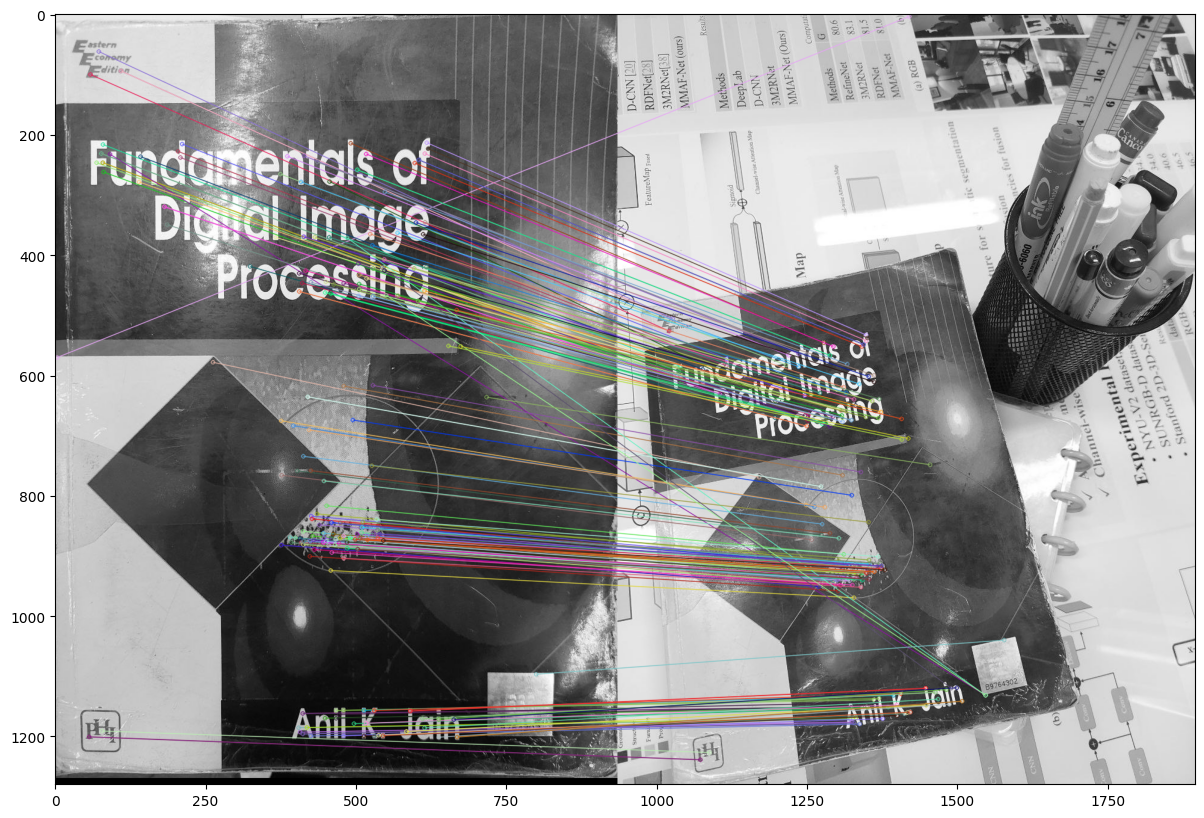

In [9]:
import cv2
import matplotlib.pyplot as plt

# Read the images
img1 = cv2.imread('template.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img4.jpg', cv2.IMREAD_GRAYSCALE)

# Create SIFT object
sift = cv2.SIFT_create()

# Detect SIFT features in both images
keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)

# Create feature matcher
bf = cv2.BFMatcher()

# Find the two closest matches for each feature
matches = bf.knnMatch(descriptors_1, descriptors_2, k=2)

# Apply Lowe's ratio test
good = []
for m, n in matches:
    if m.distance < 0.5 * n.distance:
        good.append([m])

# Draw matches
img3 = cv2.drawMatchesKnn(img1, keypoints_1, img2, keypoints_2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Set a larger figure size before showing the image
plt.figure(figsize=(15, 10))  # Adjust the size as needed
plt.imshow(img3)
plt.show()


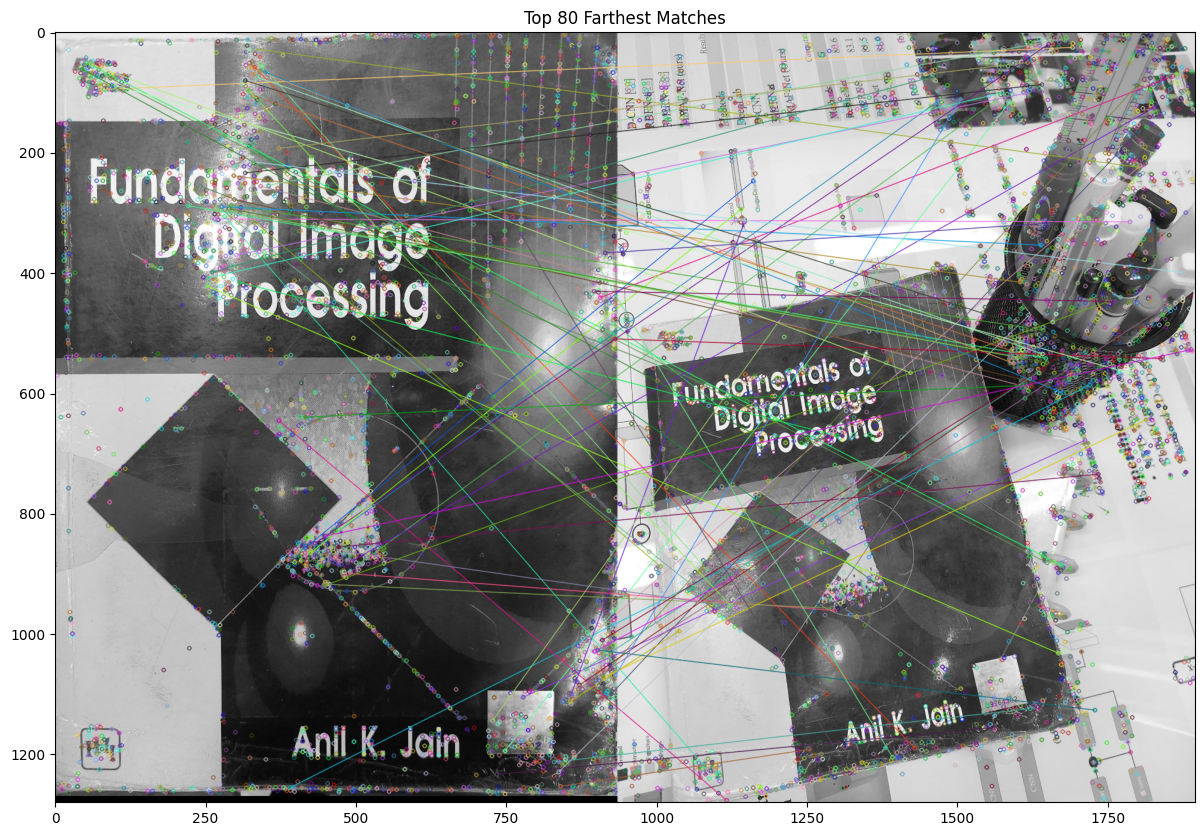

In [10]:
import cv2
import matplotlib.pyplot as plt

# Read the images
img1 = cv2.imread('template.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img4.jpg', cv2.IMREAD_GRAYSCALE)

# Create SIFT object
sift = cv2.SIFT_create()

# Detect SIFT features in both images
keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)

# Create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors_1, descriptors_2)

# Sort them in the order of their distance (closest first)
matches = sorted(matches, key=lambda x: x.distance)

# Reverse the order to get farthest points first
matches = matches[::-1]

# Draw the top 80 farthest matches
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:80], None, flags=0)

# Set a larger figure size before showing the image
plt.figure(figsize=(15, 10))  # Adjust the size as needed
plt.title("Top 80 Farthest Matches")
plt.imshow(img3)
plt.show()


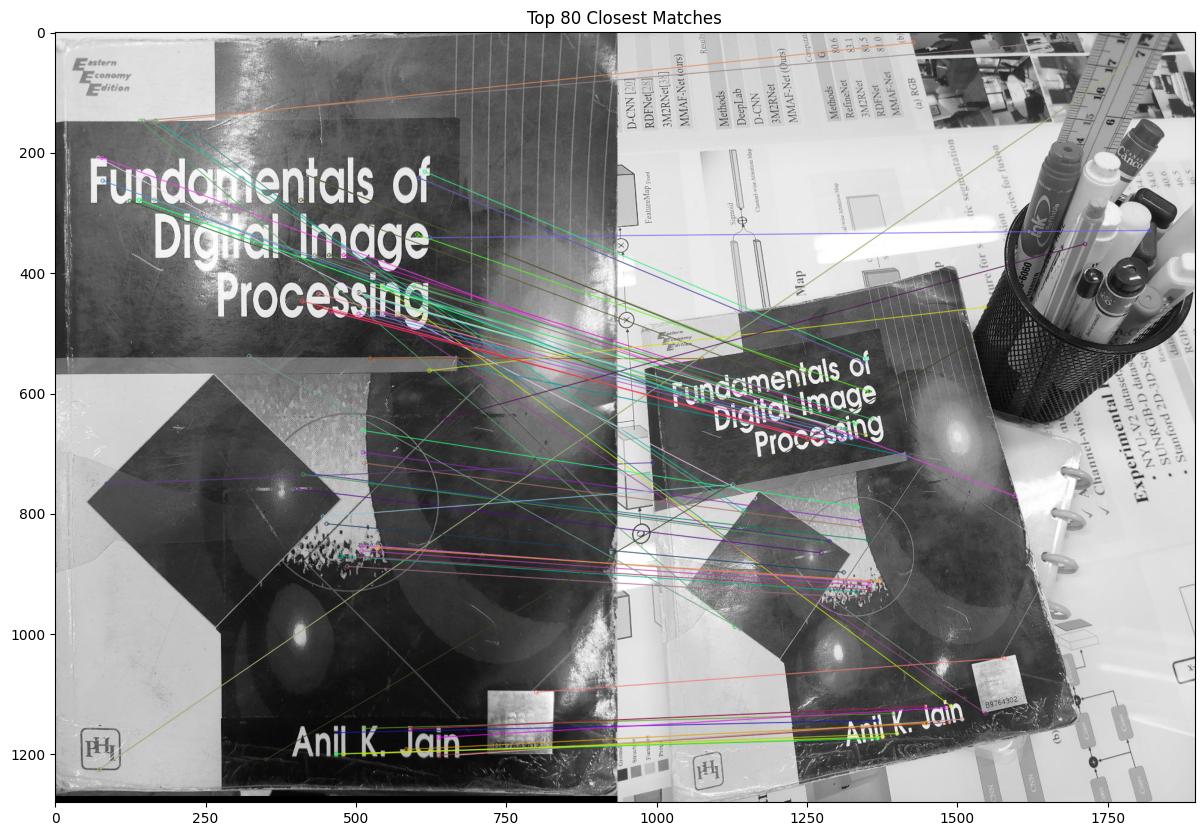

In [11]:
import cv2
import matplotlib.pyplot as plt

# Read the images
img1 = cv2.imread('template.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img4.jpg', cv2.IMREAD_GRAYSCALE)

# Create SIFT object
sift = cv2.SIFT_create()

# Detect SIFT features in both images
keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)

# Create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors_1, descriptors_2)

# Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the top 80 matches
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:80], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Set a larger figure size before showing the image
plt.figure(figsize=(15, 10))  # Adjust the size as needed
plt.title("Top 80 Closest Matches")
plt.imshow(img3)
plt.show()
